#Numba and Cython

## Cython

In [0]:
%load_ext Cython

In [0]:
%%cython
def polyn(int n):
  cdef int total=0
  cdef int i
  for i in range(n):
    total += n*2+3*43+n**2
  return total

In [35]:
start_time=time.time()
polyn(1000)
print(time.time()-start_time)

5.3882598876953125e-05


In [29]:
start_time=time.time()
polyn(1000)
print(time.time()-start_time)

6.890296936035156e-05


## Numba

In [0]:
def polyn(n):
  total=0
  for i in range(n):
    total += n*2+3*43+n**2
  return total

In [31]:
import time
start_time=time.time()
polyn(1000)
print(time.time()-start_time)

0.0004589557647705078


In [0]:
import numba
@numba.jit #decorator
def polyn(n):
  total=0
  for i in range(n):
    total += n*2+3*43+n**2
  return total

In [0]:
@numba.jit(nopython=True) # don't use python compiler at all
def polyn(n):
  total = 0
  for i in range(n):
    total+= n*2+3*43+n**2
  return total

* The above code will not use the python compiler at all.
* Another way of doing the same thing is:-

In [0]:
@numba.njit
def polyn(n):
  total = 0
  for i in range(n):
    total+= n*2+3*43+n**2
  return total

In [46]:
start=time.time()
polyn(1000)
print(time.time()-start)

4.458427429199219e-05


In [0]:
@numba.jit(nopython=True,parallel=True)
def polyn(n):
  total = 0
  for i in numba.prange(n):
    total+= n*2+3*43+n**2
  return total

In [53]:
start=time.time()
polyn(1000)
print(time.time()-start)

0.0009105205535888672


### Function Signature

In [0]:
from numba import njit, int32

@njit(int32(int32,int32))
def expfunc(x,y):
  return x**y

In [67]:
expfunc(3,3)

27

### Vectorize

In [0]:
import numpy as np

a=np.arange(200,dtype=np.int32)
b=np.arange(200,dtype=np.int32)

In [0]:
from numba import vectorize

@vectorize #target = cuda ot target = parallel can also be used
def somefunc(x,y):
  return x**y

In [79]:
somefunc(a,b)[:12]

array([         1,          1,          4,         27,        256,
             3125,      46656,     823543,   16777216,  387420489,
       1410065408, 1843829075], dtype=int32)

# Dask

In [0]:
import pandas as pd

In [84]:
filepath='yellow_tripdata_2015-03.csv'

for chunk in pd.read_csv(filepath,chunksize=10000):
  print(type(chunk),'\t',chunk.shape)

<class 'pandas.core.frame.DataFrame'> 	 (10000, 19)
<class 'pandas.core.frame.DataFrame'> 	 (10000, 19)
<class 'pandas.core.frame.DataFrame'> 	 (10000, 19)
<class 'pandas.core.frame.DataFrame'> 	 (10000, 19)
<class 'pandas.core.frame.DataFrame'> 	 (10000, 19)
<class 'pandas.core.frame.DataFrame'> 	 (10000, 19)
<class 'pandas.core.frame.DataFrame'> 	 (592, 19)


In [87]:
chunk.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
60000,2,2015-03-15 23:04:11,2015-03-15 23:18:27,5,2.74,-73.980667,40.753502,1.0,N,-73.979729,40.722939,1.0,12.5,0.5,0.5,2.76,0.0,0.3,16.56


In [88]:
chunk.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [89]:
chunk.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.0,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,1.663851,1.758446,3.762247,-72.596191,39.987137,1.111486,-72.724352,40.059365,1.0,14.835811,0.473818,0.494088,4.007922,0.530389,0.299493,20.641520
std,0.472790,1.422836,4.530419,9.997549,5.506831,0.585559,9.540870,5.255613,0.0,15.632474,0.111475,0.054093,3.931707,1.808490,0.012330,20.139235
min,1.000000,1.000000,0.000000,-74.033791,0.000000,1.000000,-74.111870,0.000000,1.0,0.000000,0.000000,0.000000,0.960000,0.000000,0.000000,5.300000
25%,1.000000,1.000000,1.187500,-73.991123,40.728287,1.000000,-73.991430,40.726369,1.0,6.500000,0.500000,0.500000,2.000000,0.000000,0.300000,9.750000
50%,2.000000,1.000000,2.100000,-73.982170,40.748381,1.000000,-73.979633,40.748394,1.0,9.500000,0.500000,0.500000,2.700000,0.000000,0.300000,13.500000
75%,2.000000,2.000000,4.412500,-73.969889,40.761873,1.000000,-73.957855,40.766432,1.0,17.500000,0.500000,0.500000,4.745000,0.000000,0.300000,23.887500
max,2.000000,6.000000,46.070000,0.000000,40.847881,5.000000,0.000000,41.267651,1.0,209.000000,0.500000,0.500000,52.250000,15.990000,0.300000,261.550000


In [0]:
def get_trip(dataframe):
  return dataframe[(dataframe.trip_distance>20)&(dataframe.trip_distance<40)]

In [93]:
get_trip(chunk)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
60030,2,2015-03-24 23:53:22,2015-03-25 00:36:43,6,20.65,-73.781754,40.644787,2.0,N,-74.009064,40.717518,1.0,52.0,0.0,0.5,10.56,0.00,0.3,63.36
60067,2,2015-03-05 23:29:24,2015-03-06 00:11:42,1,20.77,-73.789055,40.654781,2.0,N,-74.010475,40.705463,1.0,52.0,0.0,0.5,10.56,0.00,0.3,63.36
60193,2,2015-03-08 23:52:22,2015-03-09 00:27:49,1,22.62,-73.781799,40.644840,2.0,N,-74.012863,40.715839,1.0,52.0,0.0,0.5,11.63,5.33,0.3,69.76
60361,2,2015-03-11 23:10:35,2015-03-12 00:12:39,1,37.44,-73.983040,40.731503,5.0,N,-73.731819,41.099648,1.0,171.0,0.0,0.5,42.95,0.00,0.3,214.75


In [0]:
chunks=[get_trip(x) for x in pd.read_csv(filepath,chunksize=10000)]

In [98]:
long_trip_df=pd.concat(chunks)
long_trip_df.shape

(281, 19)

In [100]:
long_trip_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
241,2,2015-03-18 00:28:43,2015-03-18 00:58:12,2,23.76,-73.790085,40.643829,1.0,N,-74.012901,40.645962,2.0,62.5,0.5,0.5,0.00,0.00,0.3,63.80
456,2,2015-03-31 00:38:00,2015-03-31 01:07:16,5,23.14,-73.776787,40.645424,1.0,N,-73.979553,40.654217,1.0,60.5,0.5,0.5,0.00,0.00,0.3,61.80
775,1,2015-03-26 00:14:00,2015-03-26 00:44:21,2,20.20,0.000000,0.000000,2.0,N,0.000000,0.000000,2.0,52.0,0.0,0.5,0.00,5.33,0.3,58.13
1248,1,2015-03-08 00:08:26,2015-03-08 00:38:23,1,20.30,-73.789948,40.647099,2.0,N,-73.961327,40.774284,1.0,52.0,0.0,0.5,10.00,5.33,0.3,68.13
1635,2,2015-03-03 00:24:18,2015-03-03 01:05:27,1,27.04,-73.776955,40.644985,1.0,N,-74.108292,40.574837,1.0,73.0,0.5,0.5,16.99,10.66,0.3,101.95


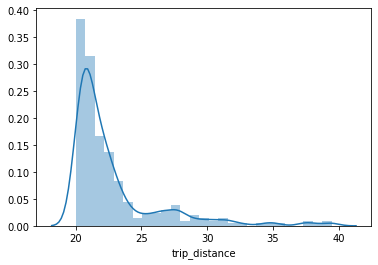

In [110]:
import seaborn as sns
sns.distplot(long_trip_df.trip_distance)

### Generators

In [0]:
chunks=(get_trip(chunk) for chunk in pd.read_csv(filepath,chunksize=10000))

In [118]:
type(chunks)

generator

* elements are generated one at a time so they all aren't all in memory at all times
* generators work on lazy evaluation

In [123]:
distances=(chunk.trip_distance.sum() for chunk in chunks)# no computation done till this step
sum(distances) # initiate computation

6410.529999999999

* Once a generator has been completely iterated through, it becomes exhausted.

In [124]:
import os
os.listdir()

['.config',
 'yellow_tripdata_2015-02.csv',
 'yellow_tripdata_2015-01.csv',
 'yellow_tripdata_2015-03.csv',
 'sample_data']

In [0]:
files=(filename for filename in os.listdir() if 'yellow' in filename) 

In [140]:
type(files)

generator

In [0]:
dataframes=(pd.read_csv(file) for file in files)

In [0]:
def get_trip_sum(df):
  return df.trip_distance.sum()

distances=(get_trip_sum(df) for df in dataframes)

In [144]:
sum(distances) # step where actual computation takes place (lazy evaluation)

7171706.199999999

### Function Composition

In [0]:
from math import sqrt
def f(z):
  return sqrt(z+4)
def g(z):
  return z-3
def h(z):
  return z**2

In [150]:
x=4
y=h(x)
z=g(y)
w=f(z)
print(w)

4.123105625617661


In [0]:
from dask import delayed

In [151]:
x=4
y=delayed(h)(x)
z=delayed(g)(y)
w=delayed(f)(z)
print(w)

Delayed('f-62d82b97-4a57-454f-bd89-75bd6dd1f263')


In [152]:
type(w)

dask.delayed.Delayed

In [153]:
w.compute()

4.123105625617661

* The delayed type object stores the computation steps until the .compute() is called after which the variable holds the computation result.

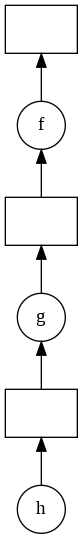

In [154]:
w.visualize() # task graph visualization

In [0]:
# we can also permanently delay functions
f=delayed(f)
g=delayed(g)
h=delayed(h)

w=f(g(h(4)))

In [156]:
type(w )

dask.delayed.Delayed

In [157]:
w.compute()

4.123105625617661

In [0]:
x=f(23)

In [160]:
type(x)

dask.delayed.Delayed

In [161]:
x.compute()

5.196152422706632

In [0]:
@delayed # delayed is a decorator
def f(z):
  return sqrt(z+4)

In [0]:
x=f(144)

In [166]:
x.compute()

12.165525060596439

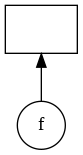

In [167]:
x.visualize()

In [0]:
@delayed
def increment(x):
  return x+1
@delayed
def double(x):
  return x*2
@delayed
def add(x,y):
  return x+y

In [0]:
data=[i for i in range(20)]
output=[]
for point in data:
  a=double(i)
  b=increment(a)
  c=add(a,b)
  output.append(c)

In [189]:
output

[Delayed('add-dda53dc5-6791-4df3-89d7-f64f95b6415d'),
 Delayed('add-5ba036d7-973a-4b8b-81ac-8cc869f832a6'),
 Delayed('add-c2eebc4d-1542-4c3a-b4f2-e73271f1350b'),
 Delayed('add-dae7aa3d-998e-459b-a14d-d316e4d1dfee'),
 Delayed('add-808ab145-5b13-4e2f-a776-65df3d70204e'),
 Delayed('add-6afe367e-9508-42e2-b518-6728560a2853'),
 Delayed('add-55c4abf3-a025-43fb-8a8a-2a9202d672a7'),
 Delayed('add-60b70583-bac7-499a-aa78-5f1f3a7edb8e'),
 Delayed('add-0826d581-2055-4d71-a56b-b9dc79404123'),
 Delayed('add-963efd39-acd5-4a9c-b142-d5463b5bbfa6'),
 Delayed('add-67117e34-2762-4154-a11f-c51e6695d156'),
 Delayed('add-f8e92406-b4e8-4f78-b714-b507fd2d62c5'),
 Delayed('add-269a45f1-1ae3-4d9d-874b-85217d2ac956'),
 Delayed('add-229464aa-cb40-448b-a7d4-760223b41e41'),
 Delayed('add-ff3acdf7-be64-4108-95d6-5ed834187e5f'),
 Delayed('add-8057626d-23f0-4b73-80cb-a0b8e2265adc'),
 Delayed('add-2b270dd8-24f2-472d-8aeb-41bc0a3983e1'),
 Delayed('add-747caf78-c024-4957-a6e4-f0b77ad2bca5'),
 Delayed('add-22072d0e-e8d0-

In [190]:
sum(output)

Delayed('add-7eec940aa225016e8bf4ccedd65c2378')

In [0]:
x=sum(output)

In [188]:
x.compute()

1700

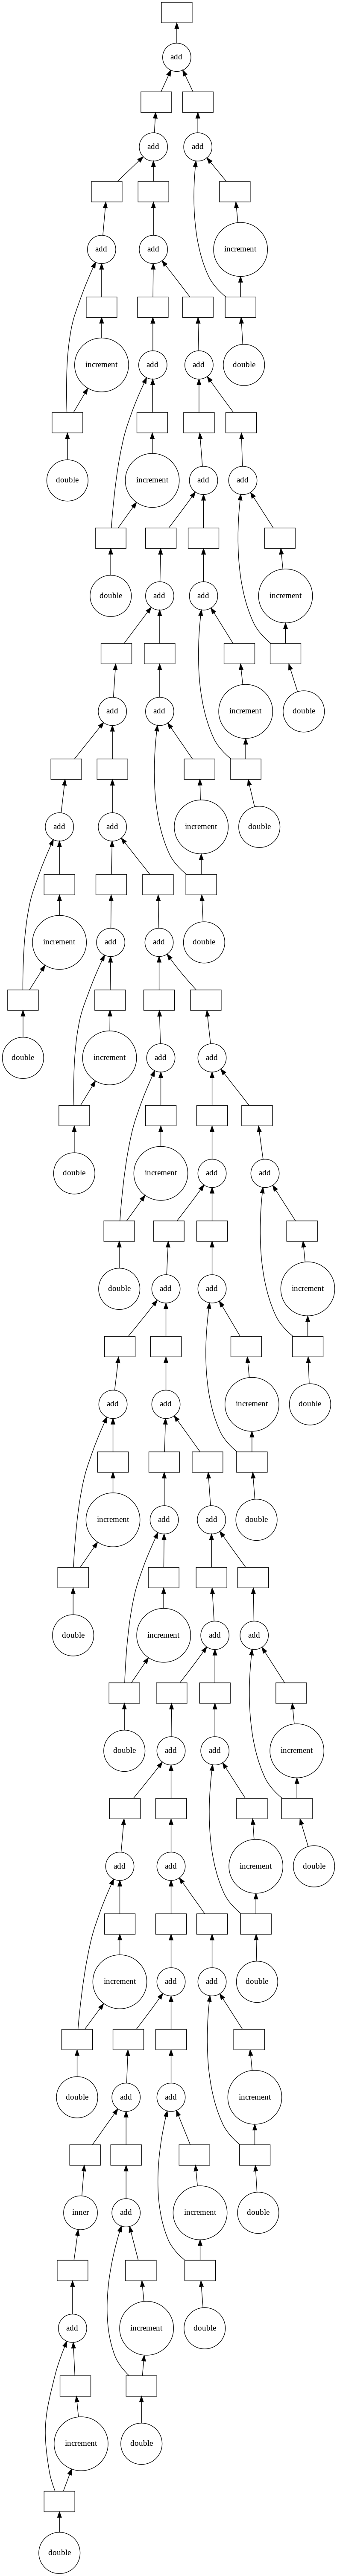

In [191]:
x.visualize() # dask users dont have to decompose computations themselves.

In [0]:
#repeating the dataframe operation using dask

filenames=[file for file in os.listdir() if 'yellow' in file]

In [0]:
@delayed
def read_file(file):
  return pd.read_csv(file)
@delayed
def get_sum(df):
  return df.trip_distance.sum()

distances=[get_sum(read_file(filename)) for filename in filenames]

In [207]:
distances

[Delayed('get_sum-5199283b-1bab-4f97-bf9d-0c4c299c5487'),
 Delayed('get_sum-c0c28704-319a-4d39-98b6-d3e42ae73455'),
 Delayed('get_sum-18f125ba-f017-4e07-8696-bfb3ce72c7d2')]

In [0]:
result=sum(distances)

In [209]:
result.compute()

7171706.199999999

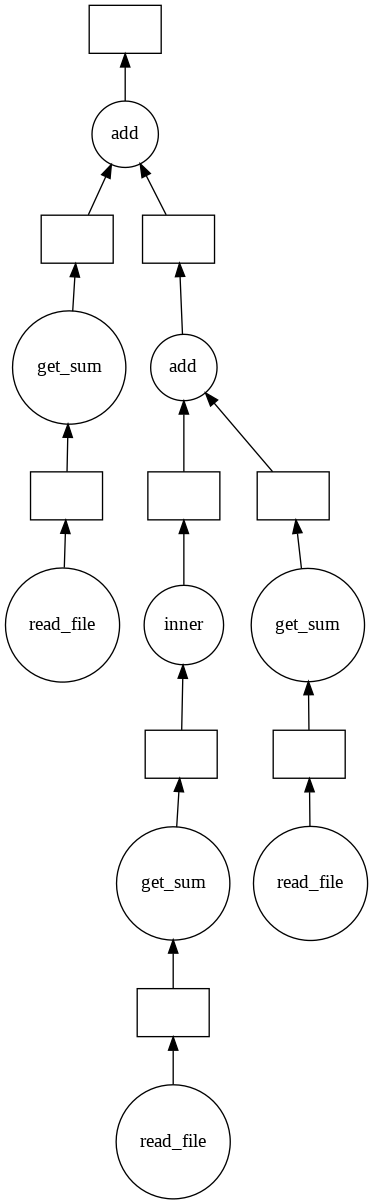

In [211]:
result.visualize(optimize_graph=False )